### Import dependencies

In [106]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline

### Create dataframe

In [107]:
sample_list = [["Male", 32, "Rock"], ["Male", 21, "Hip-Hop"], ["Female", 20, "EDM"], 
               ["Male", 40, "Jazz"], ["Female", 30, "Rock"], ["Female", 43, "Jazz"], ["Male", 24, "Hip-Hop"],
              ["Female", 21, "EDM"], ["Female", 28, "Rock"], ["Female", 36, "Jazz"], ["Male", 29, "Rock"],
              ["Male", 39, "Jazz"], ["Male", 24, "Hip-Hop"], ["Female", 23, "EDM"], ["Male", 31, "Rock"],
              ["Male", 28, "Rock"], ["Male", 26, "Rock"], ["Female", 37, "Jazz"], ["Female", 22, "EDM"],
              ["Female", 20, "Rock"]]

df = pd.DataFrame(sample_list, columns=["Gender", "Age", "Music"])
df

,Gender,Age,Music
0,Male,32,Rock
1,Male,21,Hip-Hop
2,Female,20,EDM
3,Male,40,Jazz
4,Female,30,Rock
5,Female,43,Jazz
6,Male,24,Hip-Hop
7,Female,21,EDM
8,Female,28,Rock
9,Female,36,Jazz


### Convert Gender to binary

In [108]:
df["Gender"] = df["Gender"].apply(lambda x: 1 if x == "Female" else 0)
df[:6]

,Gender,Age,Music
0,0,32,Rock
1,0,21,Hip-Hop
2,1,20,EDM
3,0,40,Jazz
4,1,30,Rock
5,1,43,Jazz


### Split and train the model

In [109]:
X = df.drop(columns=["Music"])
y = df["Music"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [110]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [111]:
score = accuracy_score(y_test, y_pred)
print("Accuracy Score: {}".format(score))

Accuracy Score: 0.75


### Sample predictions

In [112]:
sample = model.predict([[1, 38], [0, 24], [1, 25], [0, 35]])
sample

array(['Jazz', 'Hip-Hop', 'EDM', 'Jazz'], dtype=object)

### Pickle and dump

In [113]:
joblib.dump(model, "music-recommender.joblib")

['music-recommender.joblib']

### Export and visualize decision tree

In [114]:
tree.export_graphviz(model, out_file="music-recommender.dot",
                    feature_names=["Gender", "Age"],
                    class_names=sorted(y.unique()),
                    label="all", rounded=True, filled=True)

[Text(446.4, 543.6, 'Age <= 25.0\ngini = 0.727\nsamples = 16\nvalue = [4, 3, 3, 6]\nclass = Rock'),
 Text(223.2, 326.16, 'Gender <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3, 0, 0]\nclass = EDM'),
 Text(111.6, 108.72000000000003, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0, 0]\nclass = Hip-Hop'),
 Text(334.79999999999995, 108.72000000000003, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0, 0]\nclass = EDM'),
 Text(669.5999999999999, 326.16, 'Age <= 34.0\ngini = 0.444\nsamples = 9\nvalue = [0, 0, 3, 6]\nclass = Rock'),
 Text(558.0, 108.72000000000003, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 0, 6]\nclass = Rock'),
 Text(781.1999999999999, 108.72000000000003, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0]\nclass = Jazz')]

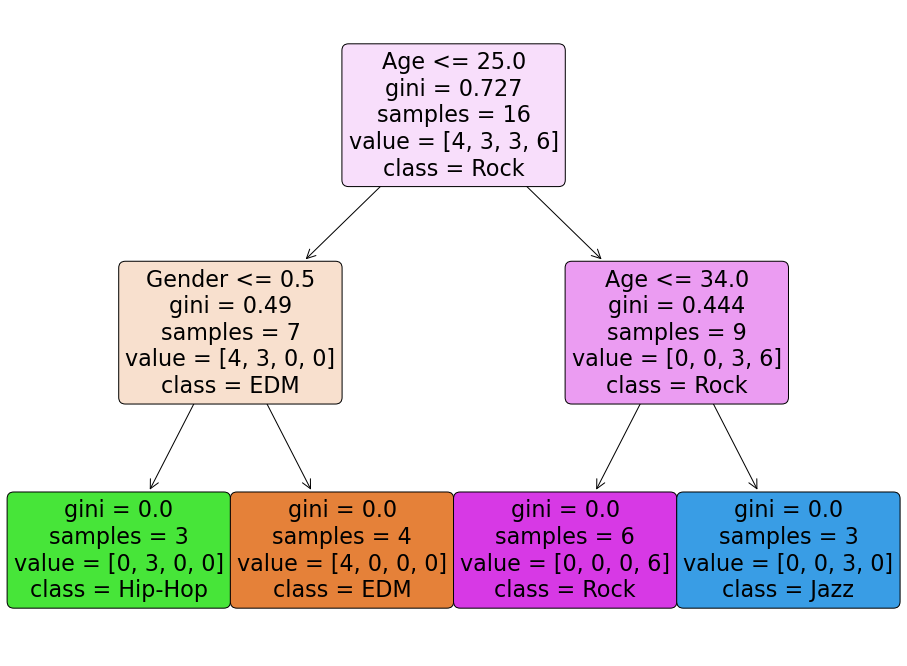

In [115]:
plt.figure(figsize=(16, 12))
tree.plot_tree(model, feature_names=["Gender", "Age"], class_names=sorted(y.unique()), 
               filled=True, label="all", rounded=True)